# Backpropagation and Multilayer Neural Networks

### Goals: 
- Intro: train a neural network with high level framework `Keras`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

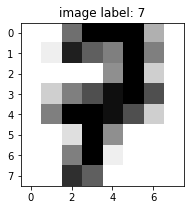

In [3]:
sample_index = 44
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)
print(scaler.scale_)

[0.0000000e+00 2.9862475e-01 5.1925344e+00 1.1842829e+01 1.1856582e+01
 5.8100853e+00 1.3477407e+00 1.1918795e-01 6.5487884e-03 1.9934512e+00
 1.0346431e+01 1.1930583e+01 1.0262607e+01 8.2049770e+00 1.8434839e+00
 9.8886706e-02 3.2743942e-03 2.6162410e+00 9.8349705e+00 6.8709888e+00
 7.1126390e+00 7.8375902e+00 1.7537656e+00 4.4531763e-02 1.3097577e-03
 2.4878848e+00 9.0445318e+00 8.7328091e+00 9.9823179e+00 7.5710545e+00
 2.2685003e+00 2.6195154e-03 0.0000000e+00 2.3614931e+00 7.6836934e+00
 9.0792408e+00 1.0371316e+01 8.7924032e+00 2.8998036e+00 0.0000000e+00
 8.5134255e-03 1.5703995e+00 6.8493776e+00 7.2285528e+00 7.6502948e+00
 8.2652264e+00 3.4859202e+00 2.6195154e-02 8.5134255e-03 6.8369353e-01
 7.4931240e+00 9.5651608e+00 9.3686972e+00 8.7766867e+00 3.7668631e+00
 2.0890635e-01 6.5487885e-04 2.7897838e-01 5.5370007e+00 1.2059594e+01
 1.1783236e+01 6.8199081e+00 2.0746562e+00 3.4250164e-01]
[1.         0.91047853 4.737475   4.259608   4.3074083  5.682445
 3.2971535  1.0088968  0.

Let's display the one of the transformed sample (after feature standardization):

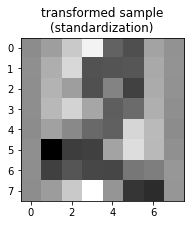

In [8]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

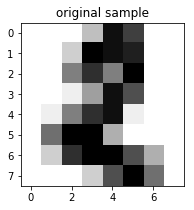

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [11]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [12]:
from tensorflow.contrib import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

/Users/imadelhanafi/anaconda/envs/ML/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/imadelhanafi/anaconda/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [23]:
X_train.shape

(1527, 64)

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [70]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=20, batch_size=32);
# Batch ---> Augmente : saturation de mémoire 


Epoch 1/20
1527/1527 [==============================] - 0s 324us/step - loss: 0.3280 - acc: 0.8939
Epoch 2/20
1527/1527 [==============================] - 0s 64us/step - loss: 0.0914 - acc: 0.9718
Epoch 3/20
1527/1527 [==============================] - 0s 62us/step - loss: 0.0416 - acc: 0.9921
Epoch 4/20
1527/1527 [==============================] - 0s 63us/step - loss: 0.0217 - acc: 0.9980
Epoch 5/20
1527/1527 [==============================] - 0s 74us/step - loss: 0.0142 - acc: 0.9980
Epoch 6/20
1527/1527 [==============================] - 0s 72us/step - loss: 0.0089 - acc: 1.0000
Epoch 7/20
1527/1527 [==============================] - 0s 76us/step - loss: 0.0070 - acc: 1.0000
Epoch 8/20
1527/1527 [==============================] - 0s 71us/step - loss: 0.0055 - acc: 1.0000
Epoch 9/20
1527/1527 [==============================] - 0s 66us/step - loss: 0.0046 - acc: 1.0000
Epoch 10/20
1527/1527 [==============================] - 0s 67us/step - loss: 0.0040 - acc: 1.0000
Epoch 11/20
1527/1

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is avaiable at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [14]:
optimizers.SGD?

Init signature: optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False, **kwargs)
Docstring:     
Stochastic gradient descent optimizer.

Includes support for momentum,
learning rate decay, and Nesterov momentum.

# Arguments
    lr: float >= 0. Learning rate.
    momentum: float >= 0. Parameter updates momentum.
    decay: float >= 0. Learning rate decay over each update.
    nesterov: boolean. Whether to apply Nesterov momentum.
File:           ~/anaconda/envs/ML/lib/python3.6/site-packages/keras/optimizers.py
Type:           type


- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [16]:
optimizers.Adam?

Init signature: optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, **kwargs)
Docstring:     
Adam optimizer.

Default parameters follow those provided in the original paper.

# Arguments
    lr: float >= 0. Learning rate.
    beta_1: float, 0 < beta < 1. Generally close to 1.
    beta_2: float, 0 < beta < 1. Generally close to 1.
    epsilon: float >= 0. Fuzz factor.
    decay: float >= 0. Learning rate decay over each update.

# References
    - [Adam - A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8)
File:           ~/anaconda/envs/ML/lib/python3.6/site-packages/keras/optimizers.py
Type:           type


In [96]:
# Using the Adam optimizer

model1 = Sequential()
model1.add(Dense(H, input_dim=N))
model1.add(Activation("tanh"))

model1.add(Dense(H))
model1.add(Activation("relu"))

model1.add(Dense(K))
model1.add(Activation("softmax"))

model1.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, Y_train, epochs=20, batch_size=20);

Epoch 1/20
1527/1527 [==============================] - 1s 660us/step - loss: 1.0284 - acc: 0.7511
Epoch 2/20
1527/1527 [==============================] - 0s 118us/step - loss: 0.2448 - acc: 0.9561
Epoch 3/20
1527/1527 [==============================] - 0s 130us/step - loss: 0.1283 - acc: 0.9751
Epoch 4/20
1527/1527 [==============================] - 0s 120us/step - loss: 0.0798 - acc: 0.9862
Epoch 5/20
1527/1527 [==============================] - 0s 115us/step - loss: 0.0535 - acc: 0.9915
Epoch 6/20
1527/1527 [==============================] - 0s 121us/step - loss: 0.0375 - acc: 0.9961
Epoch 7/20
1527/1527 [==============================] - 0s 124us/step - loss: 0.0265 - acc: 0.9987
Epoch 8/20
1527/1527 [==============================] - 0s 127us/step - loss: 0.0197 - acc: 0.9987
Epoch 9/20
1527/1527 [==============================] - 0s 129us/step - loss: 0.0148 - acc: 1.0000
Epoch 10/20
1527/1527 [==============================] - 0s 128us/step - loss: 0.0116 - acc: 1.0000
Epoch 11/

In [89]:
# Using the Adadelta optimizer
# Adaptative Learning Rate

model1 = Sequential()
model1.add(Dense(H, input_dim=N))
model1.add(Activation("tanh"))
model1.add(Dense(H))
model1.add(Activation("relu"))
model1.add(Dense(K))
model1.add(Activation("softmax"))

model1.compile(optimizer=optimizers.Adadelta(),
              loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 1s 519us/step - loss: 1.6326 - acc: 0.5639
Epoch 2/15
1527/1527 [==============================] - 0s 81us/step - loss: 0.8271 - acc: 0.8612
Epoch 3/15
1527/1527 [==============================] - 0s 75us/step - loss: 0.5071 - acc: 0.9103
Epoch 4/15
1527/1527 [==============================] - 0s 77us/step - loss: 0.3524 - acc: 0.9417
Epoch 5/15
1527/1527 [==============================] - 0s 77us/step - loss: 0.2660 - acc: 0.9561
Epoch 6/15
1527/1527 [==============================] - 0s 77us/step - loss: 0.2095 - acc: 0.9666
Epoch 7/15
1527/1527 [==============================] - 0s 78us/step - loss: 0.1717 - acc: 0.9725
Epoch 8/15
1527/1527 [==============================] - 0s 81us/step - loss: 0.1436 - acc: 0.9751
Epoch 9/15
1527/1527 [==============================] - 0s 78us/step - loss: 0.1221 - acc: 0.9797
Epoch 10/15
1527/1527 [==============================] - 0s 79us/step - loss: 0.1054 - acc: 0.9836
Epoch 11/15
1527/1

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [100]:
Predictions = model1.predict_classes(X_test)
True_False = [Predictions[i] == y_test[i] for i in range(len(Predictions))]

acc = (len(y_test) - sum(True_False))/(len(y_test))
print("Accuracy : ", 1-acc)


Accuracy :  0.9814814814814815


In [103]:
np.mean(True_False)

0.9814814814814815

In [3]:
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.

Predicted probability distribution for sample #42:
0: 0.00000
1: 0.00000
2: 0.00000
3: 0.00000
4: 0.00000
5: 0.00000
6: 0.00000
7: 0.00000
8: 1.00000
9: 0.00000

Likelihood of true class for sample #42:
0.99999666

Average negative loglikelihood of the test set:
0.0791550256489166


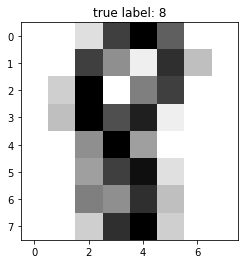

In [102]:
sample_idx = 42
plt.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("true label: %d" % y_test[sample_idx])

# Compute all probabilities for all samples in the test set at
# once:
probabilities = model.predict_proba(X_test, verbose=0)

print("Predicted probability distribution for sample #42:")
for class_idx, prob in enumerate(probabilities[sample_idx]):
    print("%d: %0.5f" % (class_idx, prob))
print()
    
print("Likelihood of true class for sample #42:")
print(probabilities[sample_idx, y_test[sample_idx]])
print()

print("Average negative loglikelihood of the test set:")
Y_test = to_categorical(y_test)
loglikelihoods = np.sum(np.log(probabilities) * Y_test, axis=1)
print(-np.mean(loglikelihoods))


## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [ ]:
from keras import initializers

normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [4]:
large_scale_init = initializers.RandomNormal(stddev=1)
small_scale_init = initializers.RandomNormal(stddev=1e-3)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('Adam', optimizers.Adam()),
#     ('SGD + Nesterov momentum', optimizers.SGD(
#             lr=0.1, momentum=0.9,nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(H, input_dim=N, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init))
        model.add(Activation("softmax"))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            epochs=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)